In [2]:
import numpy as np
import math

def pca(X, k, method="EVD") :
    # Centralize
    X = np.array(X)
    Xmean = np.mean(X, axis=1)
    X = X - Xmean.T[:,np.newaxis]

    n = X.shape[1]
    d = X.shape[0]
    if method == 'EVD' :
        C = 1/(n-1) * np.matmul(X, X.T)    #covariance matrix
        print("Covariance matrix done")
        e, U = np.linalg.eig(C)    #eigen value/vectors of C
        print("Eigen vectors done")
        idx = e.argsort()[::-1]
        U = U[:,idx[:k]].real    #sort eigen vectors by eig values
        Y = np.matmul(U.T, X)    #compress by Y = U_dxk^T X
        Xhat = np.matmul(U, Y)    #remap by Xhat = U_dxk Y
        return X, Y, Xhat, U
    elif method == 'SVD' :
        D = 1/(d-1) * np.matmul(X.T, X)    #dot product matrix
        er, V = np.linalg.eig(D)
        idxr = er.argsort()[::-1]
        V = V[:,idxr[:k]].real; er = er[idxr[:k]]    #right eigen matrix
        S = np.diag([math.sqrt(abs(e)) for e in er])    #square root of eig values
        Y = np.matmul(S, -V.T)    #compress by Y = S_kxk V_nxk^T
        #C = 1/(m-1) * np.matmul(X, X.T)
        #el, U = np.linalg.eig(C)
        #idxl = el.argsort()[::-1]
        #U = U[:,idx]
        #Xhat = np.matmul(U[:,:D], Y)
        return X, Y, None, None

In [6]:
import numpy as np
from matplotlib import pyplot as plt
import math

% matplotlib inline

sigmas = [10, 2]
theta = math.pi / 3
d, m = 2, 10

X = []
for i in range(d) :
    X.append(np.random.normal(0, sigmas[i], m))

X = [ [ dim[i] for dim in X ] for i in range(m) ]
X = [ [math.cos(theta)*ele[0]-math.sin(theta)*ele[1], math.sin(theta)*ele[0]+math.cos(theta)*ele[1]] for ele in X ]
X = [ [ row[i] for row in X ] for i in range(d) ]

Covariance matrix done
Eigen vectors done


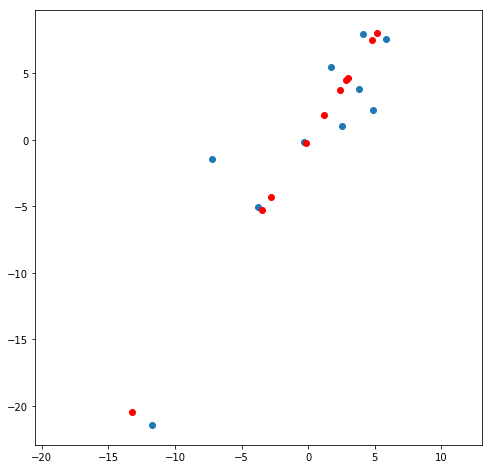

In [7]:
Xcen, _, _, P = pca(X, 1, method="EVD")
_, Y, _, _ = pca(X, 1, method="SVD")
Xhat = np.matmul(P, Y)


# Plot
plt.figure(figsize=(8,8))
plt.axis('equal')
plt.scatter(Xcen[0], Xcen[1])
plt.scatter(Xhat[0], Xhat[1], color='red')

In [8]:
from PIL import Image

PREFIX = "../databases/yaleFaces/resize/"
FILENAME = "yaleB%s_P00A+005E-10.pgm"
imgIdx = ['0'+str(n) if n < 10 else str(n) for n in range(1,40)]
imgIdx.remove('14')

# Read faces as input
HEIGHT = 192; WIDTH = 168
X = []
for idx in imgIdx :
    img = Image.open(PREFIX + FILENAME%(idx))
    img = np.array(img)
    xi = img.reshape(HEIGHT*WIDTH, -1)
    X.append(xi)
X = np.concatenate(tuple(X), axis=1)

# PCA
Xcen, Y, Xhat, P = pca(X, 100, method="EVD")

Covariance matrix done


MemoryError: 

In [ ]:
# Plot
for i in range(100) :    #plot eigen faces
    pi = list(P[:,i].T)
    print(pi)
    pi = [math.floor(pix) for pix in pi]
    pi = np.array(pi).reshape(HEIGHT,-1)
    if i < 10 :
        plt.imshow(pi, cmap='gray', vmin=0, vmax=255)
    imgTmp = Image.fromarray(pi)
    imgTmp.save('eigen_face_'+('0'+str(i) if i < 10 else str(i))+'.pgm')
print("Exporting eigen faces done")

In [9]:
# Scaling images DO NOT RUN AGAIN

from PIL import Image

PREFIX = "../databases/yaleFaces/"
FILENAME = "yaleB%s_P00A+005E-10.pgm"
imgIdx = ['0'+str(n) if n < 10 else str(n) for n in range(1,40)]
imgIdx.remove('14')

# Read faces as input
HEIGHT = 192; WIDTH = 168
X = []
for idx in imgIdx :
    img = Image.open(PREFIX + FILENAME%(idx))
    img.resize((WIDTH//4, HEIGHT//4))
    img.save(PREFIX+'resize/'+FILENAME%(idx))